# Notebook 3 - Final Model Building

In the Notebook-1, We selected the Algorithm to be used in model building, In Notebook-2 we pre-processed the testing dataset. And in this Notebook-3, We build the model, and predicting the results.

## Import Dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\aabidh musthaq\Desktop\MAchine lea projects\Competition\Data Strom\train_kaggle.csv')

c:\Program Files\Python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data preprocessing

In [3]:
df.shape

(774155, 6)

In [4]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [5]:
df.duplicated().sum()

0

In [6]:
round((df.isnull().sum()/df.shape[0])*100,2) #checking null value %

Customer_ID         0.00
outlet_city         0.00
luxury_sales        0.00
fresh_sales         0.01
dry_sales           0.00
cluster_catgeory    0.00
dtype: float64

In [7]:
df.dropna(inplace=True)

In [8]:
round((df.isnull().sum()/df.shape[0])*100,2) #checking null value %

Customer_ID         0.0
outlet_city         0.0
luxury_sales        0.0
fresh_sales         0.0
dry_sales           0.0
cluster_catgeory    0.0
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774061 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774061 non-null  float64
 1   outlet_city       774061 non-null  object 
 2   luxury_sales      774061 non-null  object 
 3   fresh_sales       774061 non-null  object 
 4   dry_sales         774061 non-null  object 
 5   cluster_catgeory  774061 non-null  object 
dtypes: float64(1), object(5)
memory usage: 41.3+ MB


In [10]:
df["cluster_catgeory"].value_counts()

1        188950
6        169197
2        155045
4        131027
3         48889
4         41400
5         39516
5             9
1             9
6             8
2             4
3             1
6\            1
95            1
98            1
99            1
100.0         1
89.0          1
Name: cluster_catgeory, dtype: int64

In [11]:
counts = df["cluster_catgeory"].value_counts()
df = df[df["cluster_catgeory"].isin(counts[counts >= 2 ].index)]

In [12]:
df["cluster_catgeory"].value_counts()

1    188950
6    169197
2    155045
4    131027
3     48889
4     41400
5     39516
1         9
5         9
6         8
2         4
Name: cluster_catgeory, dtype: int64

In [13]:
df['cluster_catgeory'] = df['cluster_catgeory'].astype('int')

In [14]:
df["cluster_catgeory"].value_counts()

1    188959
4    172427
6    169205
2    155049
3     48889
5     39525
Name: cluster_catgeory, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774054 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774054 non-null  float64
 1   outlet_city       774054 non-null  object 
 2   luxury_sales      774054 non-null  object 
 3   fresh_sales       774054 non-null  object 
 4   dry_sales         774054 non-null  object 
 5   cluster_catgeory  774054 non-null  int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 38.4+ MB


In [16]:
df['luxury_sales'] = pd.to_numeric(df['luxury_sales'], errors='coerce')

non_numeric_count = df['luxury_sales'].isna().sum()

print("Count of non-numeric values in 'luxury_sales' column:", non_numeric_count)

Count of non-numeric values in 'luxury_sales' column: 10


In [17]:
df['fresh_sales'] = pd.to_numeric(df['fresh_sales'], errors='coerce')

non_numeric_count = df['fresh_sales'].isna().sum()

print("Count of non-numeric values in 'fresh_sales' column:", non_numeric_count)

Count of non-numeric values in 'fresh_sales' column: 9


In [18]:
df['dry_sales'] = pd.to_numeric(df['dry_sales'], errors='coerce')

non_numeric_count = df['dry_sales'].isna().sum()

print("Count of non-numeric values in 'dry_sales' column:", non_numeric_count)

Count of non-numeric values in 'dry_sales' column: 8


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774054 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774054 non-null  float64
 1   outlet_city       774054 non-null  object 
 2   luxury_sales      774044 non-null  float64
 3   fresh_sales       774045 non-null  float64
 4   dry_sales         774046 non-null  float64
 5   cluster_catgeory  774054 non-null  int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 38.4+ MB


In [20]:
df['Customer_ID'] = df['Customer_ID'].astype('category')

In [21]:
df['cluster_catgeory'] = df['cluster_catgeory'].astype('category')

In [22]:
df["cluster_catgeory"].value_counts()

1    188959
4    172427
6    169205
2    155049
3     48889
5     39525
Name: cluster_catgeory, dtype: int64

In [23]:
cor = df.iloc[::-1].corr() 

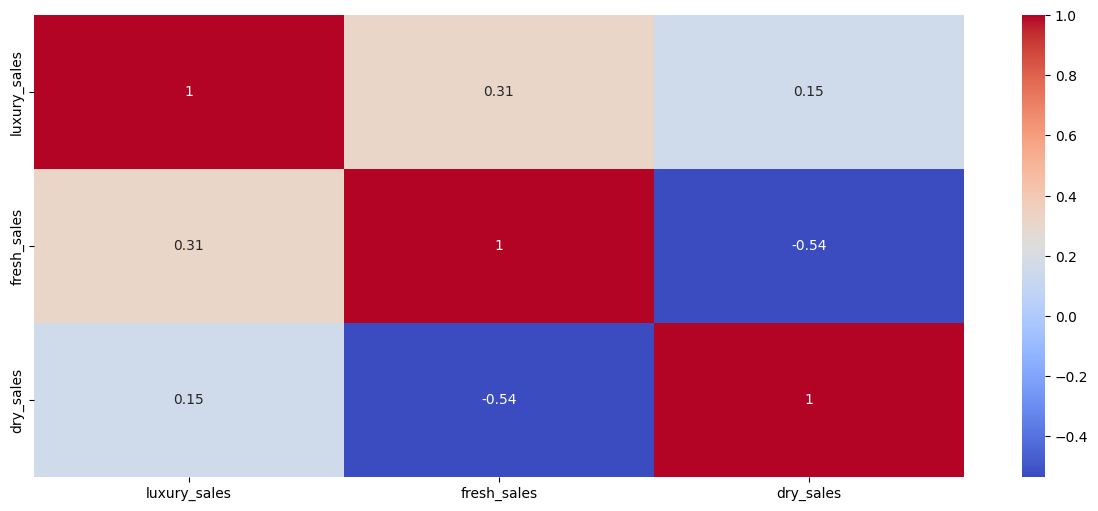

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True,cmap ='coolwarm')
plt.show()

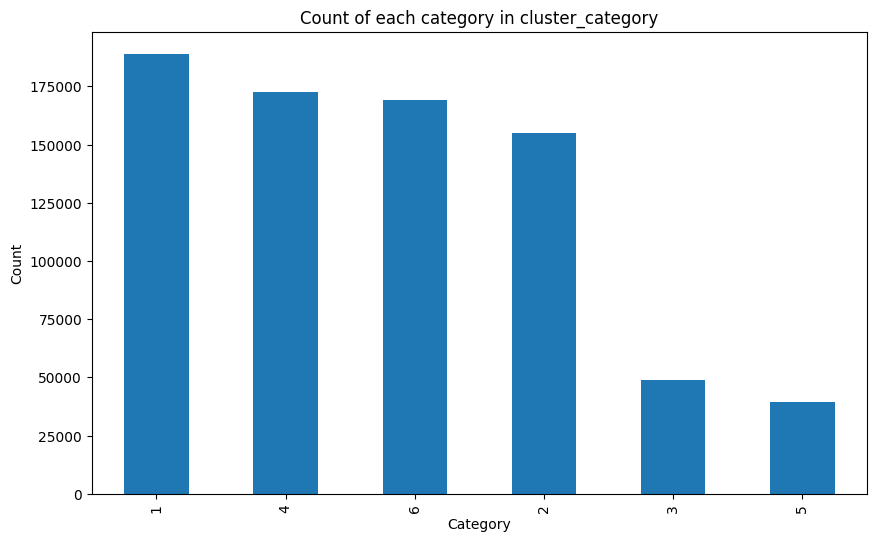

In [25]:
# Count the occurrences of each category
category_counts = df['cluster_catgeory'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of each category in cluster_category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

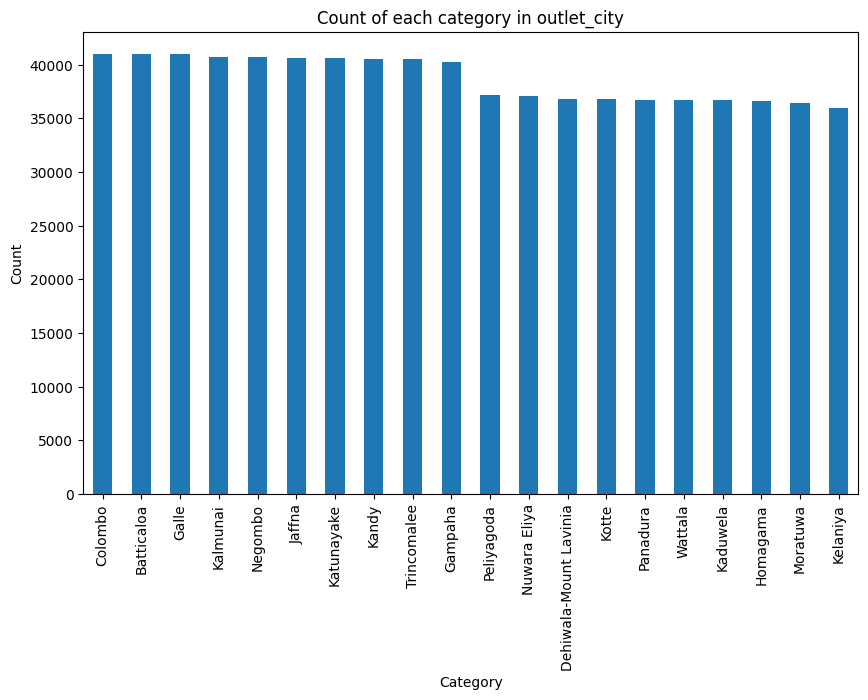

In [26]:
# Count the occurrences of each category
category_counts = df['outlet_city'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of each category in outlet_city')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

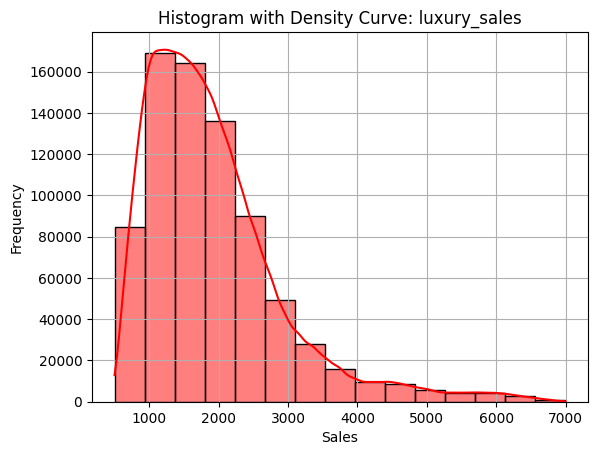

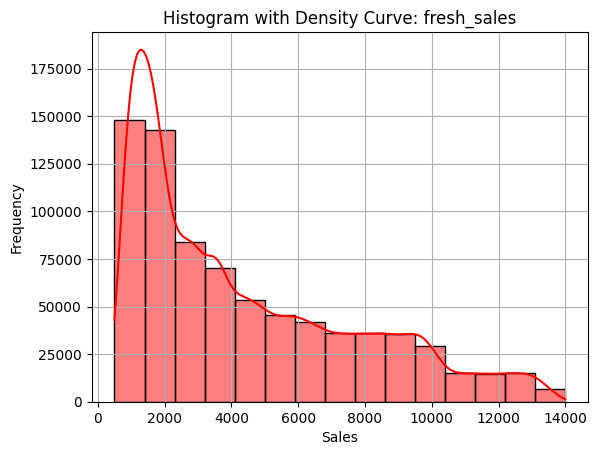

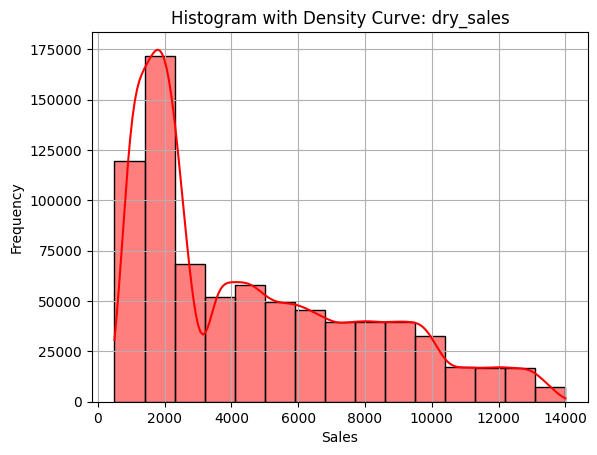

In [27]:
# List of sales columns
sales_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']

# For each sales column, create a histogram with density curve overlaid
for col in sales_columns:
    plt.figure()
    df[col].hist(density=True, bins=15, alpha=0.6, color='g')
    sns.histplot(df[col], kde=True, bins=15, color='r')
    plt.title(f'Histogram with Density Curve: {col}')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.show()

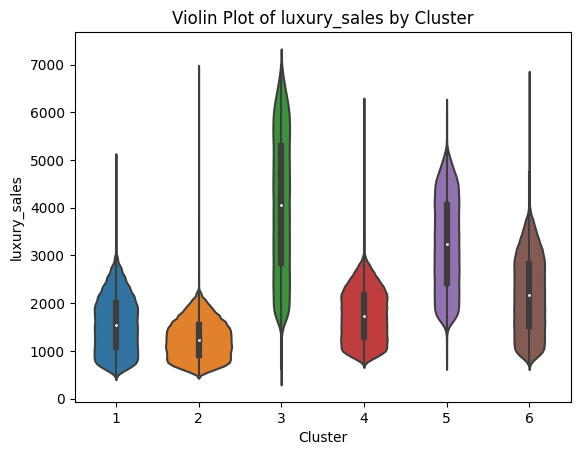

In [28]:
# Create the violin plot
sns.violinplot(x='cluster_catgeory', y='luxury_sales', data=df)
plt.title('Violin Plot of luxury_sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('luxury_sales')
plt.show()

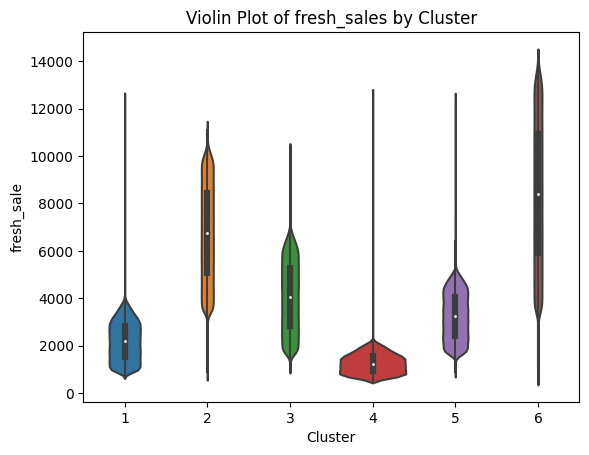

In [29]:
# Create the violin plot
sns.violinplot(x='cluster_catgeory', y='fresh_sales', data=df)
plt.title('Violin Plot of fresh_sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('fresh_sale')
plt.show()

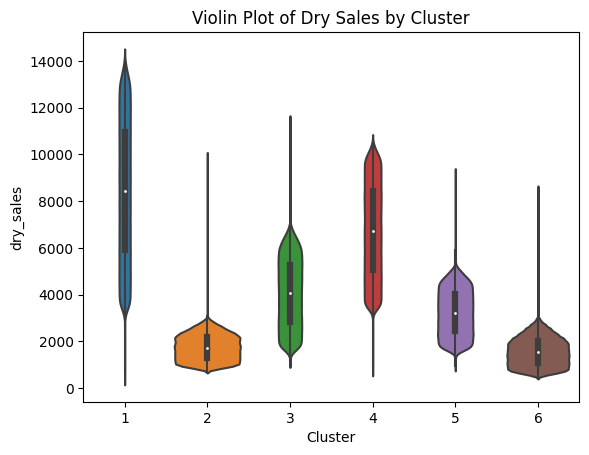

In [30]:
# Create the violin plot
sns.violinplot(x='cluster_catgeory', y='dry_sales', data=df)
plt.title('Violin Plot of Dry Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('dry_sales')
plt.show()

In [31]:
from scipy.stats import chi2_contingency

In [32]:
# contingency table
contingency_table = pd.crosstab(df['cluster_catgeory'], df['outlet_city'])
print("Contingency Table:")
print(contingency_table)

# chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the categories.")

Contingency Table:
outlet_city       Batticaloa  Colombo  Dehiwala-Mount Lavinia  Galle  Gampaha  \
cluster_catgeory                                                                
1                      18958    19018                       1  19033    18757   
2                          2        0                   15647      2        1   
3                       4900     4956                       0   4931     4830   
4                          0        3                   17282      1        0   
5                          2        2                    3900      2        1   
6                      17147    17044                       3  17036    16653   

outlet_city       Homagama  Jaffna  Kaduwela  Kalmunai  Kandy  Katunayake  \
cluster_catgeory                                                            
1                        2   18821         1     18852  18895       19078   
2                    15463       2     15477         3      0           2   
3                       

In [33]:
from scipy.stats import pointbiserialr

In [34]:
df.isnull().sum()

Customer_ID          0
outlet_city          0
luxury_sales        10
fresh_sales          9
dry_sales            8
cluster_catgeory     0
dtype: int64

In [35]:
df.dropna(inplace=True)

## Feature engineering 

In [36]:
df["cluster_catgeory"].value_counts()

1    188956
4    172424
6    169203
2    155037
3     48887
5     39525
Name: cluster_catgeory, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774032 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       774032 non-null  category
 1   outlet_city       774032 non-null  object  
 2   luxury_sales      774032 non-null  float64 
 3   fresh_sales       774032 non-null  float64 
 4   dry_sales         774032 non-null  float64 
 5   cluster_catgeory  774032 non-null  category
dtypes: category(2), float64(3), object(1)
memory usage: 55.2+ MB


In [38]:
#total sales column
df['total_sales'] = df['luxury_sales'] + df['fresh_sales'] + df['dry_sales']

In [39]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,7257.60
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,8657.32
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,12925.44
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,13114.36
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,13659.03


In [40]:
# Create a mapping from city to province
#common_groups = {'Urban': ['Colombo', 'Batticaloa', 'Galle', 'Negombo', 'Jaffna', 'Katunayake', 'Kandy', 'Trincomalee', 'Gampaha', 'Peliyagoda', 'Nuwara Eliya', 'Panadura', 'Wattala',  'Kalmunai'], 
                 #'Suburban': ['Dehiwala-Mount Lavinia', 'Kotte', 'Kaduwela', 'Homagama', 'Moratuwa', 'Kelaniya', 'Anuradhapura', 'Madawachchiya']}

#city_to_province = {city: province for province, cities in common_groups.items() for city in cities}

# Replace the 'outlet_city' values with the corresponding province names
#df['Council'] = df['outlet_city'].map(city_to_province)

In [41]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,7257.60
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,8657.32
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,12925.44
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,13114.36
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,13659.03


In [42]:
# Convert values in the "outlet_city" column to lowercase
df["outlet_city"] = df["outlet_city"].str.lower()

In [43]:
#df["Council"].value_counts()

In [44]:
df["outlet_city"].value_counts()

colombo                   41022
batticaloa                41007
galle                     41004
kalmunai                  40708
negombo                   40696
jaffna                    40672
katunayake                40642
kandy                     40528
trincomalee               40523
gampaha                   40242
peliyagoda                37142
nuwara eliya              37097
dehiwala-mount lavinia    36832
kotte                     36784
panadura                  36721
wattala                   36714
kaduwela                  36687
homagama                  36634
moratuwa                  36412
kelaniya                  35965
Name: outlet_city, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774032 entries, 0 to 774154
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       774032 non-null  category
 1   outlet_city       774032 non-null  object  
 2   luxury_sales      774032 non-null  float64 
 3   fresh_sales       774032 non-null  float64 
 4   dry_sales         774032 non-null  float64 
 5   cluster_catgeory  774032 non-null  category
 6   total_sales       774032 non-null  float64 
dtypes: category(2), float64(4), object(1)
memory usage: 61.2+ MB


In [46]:
df["cluster_catgeory"].nunique()

6

In [47]:
df["cluster_catgeory"].value_counts()

1    188956
4    172424
6    169203
2    155037
3     48887
5     39525
Name: cluster_catgeory, dtype: int64

In [48]:
df.shape

(774032, 7)

In [49]:
df["cluster_catgeory"].value_counts()

1    188956
4    172424
6    169203
2    155037
3     48887
5     39525
Name: cluster_catgeory, dtype: int64

In [50]:
df['cluster_catgeory'] = df['cluster_catgeory'].astype('int')

In [51]:
df["cluster_catgeory"].value_counts()

1    188956
4    172424
6    169203
2    155037
3     48887
5     39525
Name: cluster_catgeory, dtype: int64

In [52]:
df["cluster_catgeory"].nunique()

6

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774032 entries, 0 to 774154
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       774032 non-null  category
 1   outlet_city       774032 non-null  object  
 2   luxury_sales      774032 non-null  float64 
 3   fresh_sales       774032 non-null  float64 
 4   dry_sales         774032 non-null  float64 
 5   cluster_catgeory  774032 non-null  int32   
 6   total_sales       774032 non-null  float64 
dtypes: category(1), float64(4), int32(1), object(1)
memory usage: 63.4+ MB


In [54]:
df.shape

(774032, 7)

In [55]:
df.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
total_sales         0
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
total_sales         0
dtype: int64

In [58]:
df.describe()

,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
count,774032.000000,774032.000000,774032.000000,774032.000000,774032.000000
mean,1921.947639,4428.734816,4676.299817,3.292151,11026.982272
std,1004.033608,3334.735492,3409.426628,1.867040,3836.937367
min,500.000000,500.000000,500.000000,1.000000,4509.900000
25%,1213.530000,1620.157500,1787.930000,2.000000,7817.980000
50%,1715.280000,3356.480000,3727.760000,3.000000,10769.220000
75%,2338.690000,6671.820000,7162.300000,5.000000,13733.730000
max,6999.650000,13997.900000,13999.300000,6.000000,20989.500000


In [59]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
0,10493832.0,kelaniya,1209.60,756.00,5292.00,4,7257.60
1,10178643.0,moratuwa,1590.12,1060.08,6007.12,1,8657.32
2,10513916.0,wattala,2288.88,1481.04,9155.52,4,12925.44
3,10334589.0,wattala,2274.94,1739.66,9099.76,4,13114.36
4,10458365.0,kelaniya,2345.49,2069.55,9243.99,4,13659.03


In [60]:
df.shape

(774032, 7)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774032 entries, 0 to 774154
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       774032 non-null  category
 1   outlet_city       774032 non-null  object  
 2   luxury_sales      774032 non-null  float64 
 3   fresh_sales       774032 non-null  float64 
 4   dry_sales         774032 non-null  float64 
 5   cluster_catgeory  774032 non-null  int32   
 6   total_sales       774032 non-null  float64 
dtypes: category(1), float64(4), int32(1), object(1)
memory usage: 63.4+ MB


## Standardizing

In [62]:
from sklearn.preprocessing import StandardScaler

# Define the columns you want to scale
columns_to_scale = ['luxury_sales', 'fresh_sales', 'dry_sales','total_sales']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774032 entries, 0 to 774154
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       774032 non-null  category
 1   outlet_city       774032 non-null  object  
 2   luxury_sales      774032 non-null  float64 
 3   fresh_sales       774032 non-null  float64 
 4   dry_sales         774032 non-null  float64 
 5   cluster_catgeory  774032 non-null  int32   
 6   total_sales       774032 non-null  float64 
dtypes: category(1), float64(4), int32(1), object(1)
memory usage: 63.4+ MB


In [64]:
df.describe()

,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
count,7.740320e+05,7.740320e+05,7.740320e+05,774032.000000,7.740320e+05
mean,5.052539e-16,8.019438e-17,5.083383e-16,3.292151,-3.096149e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.867040,1.000001e+00
min,-1.416236e+00,-1.178126e+00,-1.224928e+00,1.000000,-1.698513e+00
25%,-7.055721e-01,-8.422195e-01,-8.471723e-01,2.000000,-8.363453e-01
50%,-2.058375e-01,-3.215414e-01,-2.782111e-01,3.000000,-6.717921e-02
75%,4.150684e-01,6.726430e-01,7.291554e-01,5.000000,7.054453e-01
max,5.057306e+00,2.869544e+00,2.734479e+00,6.000000,2.596478e+00


In [65]:
# Define the mapping dictionary
#mapping = {'Urban': 0, 'Suburban': 1}

# Encode the 'Season' column
#df['Council'] = df['Council'].map(mapping)

In [66]:
df = pd.get_dummies(df, columns=['outlet_city'])

In [67]:
df.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,...,outlet_city_katunayake,outlet_city_kelaniya,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala
0,10493832.0,-0.709486,-1.101358,0.180588,4,-0.982394,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,10178643.0,-0.330495,-1.010172,0.390336,1,-0.617593,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,10513916.0,0.365458,-0.883937,1.313776,4,0.494785,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10334589.0,0.351574,-0.806384,1.297421,4,0.544022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10458365.0,0.421841,-0.707458,1.339725,4,0.685977,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
df.shape

(774032, 26)

In [69]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [70]:
main_df=df.copy()

In [71]:
test_df=pd.read_csv(r'C:\Users\aabidh musthaq\Desktop\MAchine lea projects\Competition\Data Strom\test5.csv')

In [72]:
test_df.shape

(40749, 27)

In [73]:
final_df=pd.concat([df,test_df],axis=0)

In [74]:
final_df['cluster_catgeory']

0        4.0
1        1.0
2        4.0
3        4.0
4        4.0
        ... 
40744    NaN
40745    NaN
40746    NaN
40747    NaN
40748    NaN
Name: cluster_catgeory, Length: 814781, dtype: float64

In [75]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [76]:
final_df.shape

(814781, 28)

In [77]:
final_df

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,...,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala,outlet_city_anuradhapura,outlet_city_madawachiya
0,10493832.0,-0.709486,-1.101358,0.180588,4.0,-0.982394,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,10178643.0,-0.330495,-1.010172,0.390336,1.0,-0.617593,0,0,0,0,...,0,1,0,0,0,0,0,0,NaN,NaN
2,10513916.0,0.365458,-0.883937,1.313776,4.0,0.494785,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
3,10334589.0,0.351574,-0.806384,1.297421,4.0,0.544022,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
4,10458365.0,0.421841,-0.707458,1.339725,4.0,0.685977,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40744,33698.0,1.981911,-0.084108,-0.227219,NaN,0.243373,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
40745,4185.0,1.260083,-0.429573,-0.467164,NaN,-0.461195,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
40746,28664.0,1.904325,-0.146734,-0.290685,NaN,0.111827,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
40747,11874.0,2.377693,-0.077605,-0.110746,NaN,0.456390,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0


In [78]:
df_Train=final_df.iloc[:774032,:]
df_Test=final_df.iloc[774032:,:]

In [79]:
df_Train.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,...,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala,outlet_city_anuradhapura,outlet_city_madawachiya
0,10493832.0,-0.709486,-1.101358,0.180588,4.0,-0.982394,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,10178643.0,-0.330495,-1.010172,0.390336,1.0,-0.617593,0,0,0,0,...,0,1,0,0,0,0,0,0,NaN,NaN
2,10513916.0,0.365458,-0.883937,1.313776,4.0,0.494785,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
3,10334589.0,0.351574,-0.806384,1.297421,4.0,0.544022,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
4,10458365.0,0.421841,-0.707458,1.339725,4.0,0.685977,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [80]:
df_Train.fillna(0, inplace=True)

c:\Program Files\Python37\lib\site-packages\pandas\core\frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [81]:
df_Train.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,...,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala,outlet_city_anuradhapura,outlet_city_madawachiya
0,10493832.0,-0.709486,-1.101358,0.180588,4.0,-0.982394,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,10178643.0,-0.330495,-1.010172,0.390336,1.0,-0.617593,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
2,10513916.0,0.365458,-0.883937,1.313776,4.0,0.494785,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
3,10334589.0,0.351574,-0.806384,1.297421,4.0,0.544022,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
4,10458365.0,0.421841,-0.707458,1.339725,4.0,0.685977,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [82]:
df_Train.shape

(774032, 28)

In [83]:
df_Test.shape

(40749, 28)

In [84]:
df_Test.drop(['cluster_catgeory'],axis=1,inplace=True)

c:\Program Files\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
X_train=df_Train.drop(['Customer_ID',  'cluster_catgeory'],axis=1)
y_train=df_Train['cluster_catgeory']

## Fitting Model

In [86]:
# Import libraries for model testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [87]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes classifier

# Import CatBoost, LightGBM, and XGBoost classifiers
#from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
# Define the dictionary of classifiers
#models = {
    #SVC(kernel='linear', random_state=0): 'Support Vector Classifier',
    #KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski'): 'K Nearest Neighbors Classifier',
    #RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt'): 'Random Forest Classifier',
    #GradientBoostingClassifier(n_estimators=100, random_state=0): 'Gradient Boosting Classifier',
#}

In [88]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#def compare_models_train():
    #for model in models:  # Iterate over each model in the models dictionary
        #model.fit(x_train, y_train)  # Train the model
        #train_data_prediction = model.predict(x_train)  # Predict using the trained model
        
        # Calculate evaluation metrics
        #accuracy = accuracy_score(train_data_prediction, y_train)
        #precision = precision_score(train_data_prediction, y_train, average='weighted')
        #recall = recall_score(train_data_prediction, y_train, average='weighted')
        #f1 = f1_score(train_data_prediction,y_train, average='weighted')
        
        # Print evaluation metrics
        #print(models[model], 'metrics:')
        #print('Accuracy:', accuracy)
        #print('Precision:', precision)
        #print('Recall:', recall)
        #print('F1 Score:', f1)

In [89]:
#compare_models_train()

In [90]:
#def compare_models_train_test():
    #for model in models:  # Iterate over each model in the models dictionary
        #model.fit(x_train, y_train)  # Train the model
        #test_data_prediction = model.predict(x_test)  # Predict using the trained model
        
        # Calculate evaluation metrics
        #accuracy = accuracy_score(test_data_prediction, y_test)
        #precision = precision_score(test_data_prediction, y_test, average='weighted')
        #recall = recall_score(test_data_prediction, y_test, average='weighted')
        #f1 = f1_score(test_data_prediction, y_test, average='weighted')
        
        # Print evaluation metrics
        #print(models[model], 'metrics:')
        #print('Accuracy:', accuracy)
        #print('Precision:', precision)
        #print('Recall:', recall)
        #print('F1 Score:', f1)

In [91]:
#compare_models_train_test() 

In [92]:
from sklearn.neighbors import KNeighborsClassifier
rf_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
# Train the model
rf_model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [93]:
#from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
#rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')

# Train the model
#rf_model.fit(X_train, y_train)

## Testing Model

In [94]:
df_Test.fillna(0, inplace=True)

c:\Program Files\Python37\lib\site-packages\pandas\core\frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [95]:
X_test = df_Test.drop(['Customer_ID'], axis=1)

In [96]:
X_test.head()

,luxury_sales,fresh_sales,dry_sales,total_sales,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,outlet_city_gampaha,outlet_city_homagama,...,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala,outlet_city_anuradhapura,outlet_city_madawachiya
0,0.756569,-0.257052,2.300097,2.020720,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,-0.208718,-0.557303,1.394065,0.699045,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,-1.068982,-0.955614,0.149628,-0.982024,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,-0.287859,-0.633636,1.346014,0.568833,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,-0.884630,-0.873082,0.218043,-0.800712,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [97]:
y_pred = rf_model.predict(X_test)

In [98]:
y_pred

array([1., 1., 1., ..., 5., 5., 5.])

## Prediction Results

In [100]:
# Create a DataFrame for the submission
submission = pd.DataFrame({
    'Customer_ID': df_Test['Customer_ID'],
    'cluster_catgeory': y_pred
})

# Save the submission to an Excel file
submission.to_csv('preds.csv', index=False)

## Model Output

In [101]:
import pickle

In [102]:
# Save the model to a file using pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)